# Workshop #5. Basics of `scanpy`

Firstly, let's install necessary Python packages.

In [ ]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

## AnnData

In [2]:
import scanpy as sc
import seaborn as sns
import numpy as np

# `verbosity = 3` means show every log message
sc.settings.verbosity = 3

In [3]:
# Reading the dataset

adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")

reading filtered_feature_bc_matrix.h5
 (0:00:01)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
# Make gene names unique

adata.var_names_make_unique()

In [5]:
# Expression matrix

adata.X

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [6]:
# Sparse to dense matrix transformation

adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# Dense to sparse matrix transformation

from scipy.sparse import csr_matrix

X = np.array([[0, 1], [0, 0]])
X

array([[0, 1],
       [0, 0]])

In [8]:
X_sparse = csr_matrix(X)
X_sparse

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [9]:
# How to create AnnData manually

my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_adata = sc.AnnData(X=my_matrix)

my_adata

AnnData object with n_obs × n_vars = 3 × 3

In [10]:
# DataFrame with cells' annotation
adata.obs

""
AAACCCAAGGCCCAAA-1
AAACCCAAGTAATACG-1
AAACCCAAGTCACACT-1
AAACCCACAAAGCGTG-1
AAACCCACAATCGAAA-1
...
TTTGTTGGTTGGATCT-1
TTTGTTGGTTTCTTAC-1
TTTGTTGTCCATTTCA-1
TTTGTTGTCTACACAG-1


In [11]:
adata.obs["tissue"] = "PBMC"
adata.obs

,tissue
AAACCCAAGGCCCAAA-1,PBMC
AAACCCAAGTAATACG-1,PBMC
AAACCCAAGTCACACT-1,PBMC
AAACCCACAAAGCGTG-1,PBMC
AAACCCACAATCGAAA-1,PBMC
...,...
TTTGTTGGTTGGATCT-1,PBMC
TTTGTTGGTTTCTTAC-1,PBMC
TTTGTTGTCCATTTCA-1,PBMC
TTTGTTGTCTACACAG-1,PBMC


In [12]:
# Categorical Series

adata.obs["tissue"] = adata.obs.tissue.astype("category")
adata.obs.tissue

AAACCCAAGGCCCAAA-1    PBMC
AAACCCAAGTAATACG-1    PBMC
AAACCCAAGTCACACT-1    PBMC
AAACCCACAAAGCGTG-1    PBMC
AAACCCACAATCGAAA-1    PBMC
                      ... 
TTTGTTGGTTGGATCT-1    PBMC
TTTGTTGGTTTCTTAC-1    PBMC
TTTGTTGTCCATTTCA-1    PBMC
TTTGTTGTCTACACAG-1    PBMC
TTTGTTGTCTCATTAC-1    PBMC
Name: tissue, Length: 11996, dtype: category
Categories (1, object): ['PBMC']

In [13]:
# DataFrame with genes' annotation

del adata.var["genome"], adata.var["feature_types"]
adata.var["mt"] = adata.var.index.str.startswith("MT-")
adata.var

,gene_ids,mt
MIR1302-2HG,ENSG00000243485,False
FAM138A,ENSG00000237613,False
OR4F5,ENSG00000186092,False
AL627309.1,ENSG00000238009,False
AL627309.3,ENSG00000239945,False
...,...,...
AC141272.1,ENSG00000277836,False
AC023491.2,ENSG00000278633,False
AC007325.1,ENSG00000276017,False
AC007325.4,ENSG00000278817,False


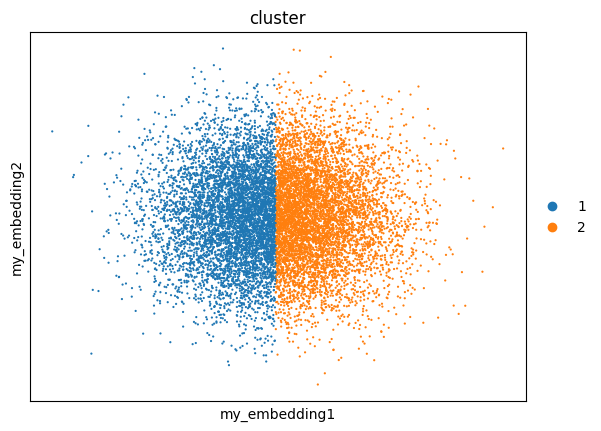

In [14]:
# Embeddings plotting

adata.obsm["my_embedding"] = np.random.normal(size=(11996, 2))
adata.obs["cluster"] = ["1" if i else "2" for i in (adata.obsm["my_embedding"][:, 0] < 0)]

sc.pl.embedding(adata, basis="my_embedding", color="cluster")

In [15]:
# Subselection in AnnData objects

adata[["TTTGTTGTCTCATTAC-1", "TTTGTTGGTTGGATCT-1"], ["CD4", "CD8A"]]

View of AnnData object with n_obs × n_vars = 2 × 2
    obs: 'tissue', 'cluster'
    var: 'gene_ids', 'mt'
    uns: 'cluster_colors'
    obsm: 'my_embedding'

In [16]:
# Layers in AnnData object

adata.layers["counts"] = adata.X.copy()
adata.layers["counts"]

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [17]:
# Saving AnnData object

adata.write_h5ad("adata.h5ad")

## Diagnostic plots for cells' QC

<Axes: ylabel='Count'>

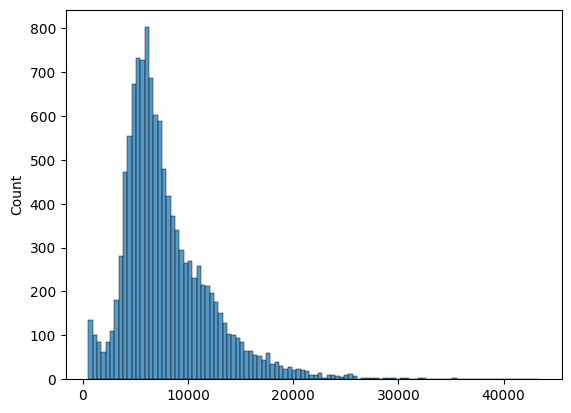

In [18]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

<Axes: ylabel='Count'>

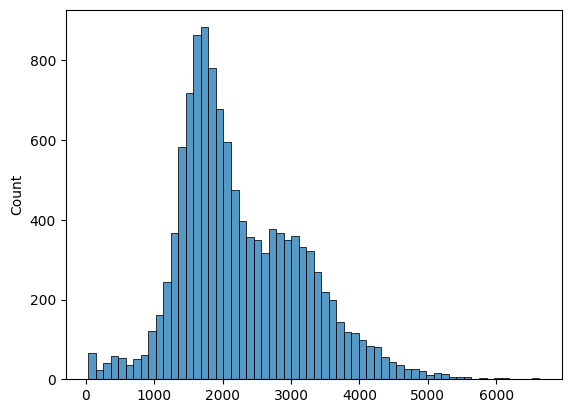

In [19]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

<Axes: ylabel='Count'>

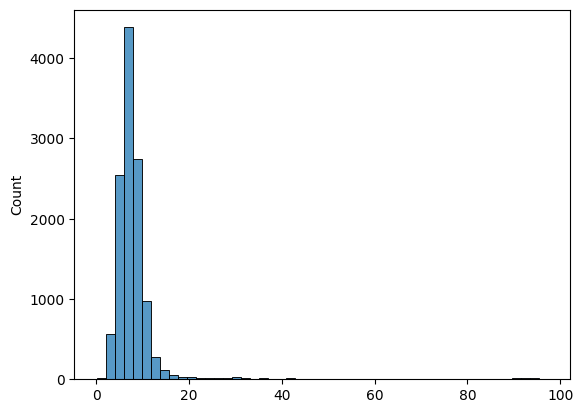

In [20]:
# % of mitochondrial expression per each cell distribution

mito_counts = adata[:, adata.var["mt"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50)

# Hometask

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

Bimodal distribution of the number of UMIs per cell in a dataset may be caused by technical variations:



*   cell-to-cell differences in the conversion factor between transcripts and captured UMIs;
*   variations in the sequencing depth;
*   the effects of total UMI variations are disproportionally biased towards genes with lower expression. The disparity in the number of UMIs is further exacerbated in scenarios in which two groups of cells being compared are captured and sequenced separately.

Chen, W., Li, Y., Easton, J. et al. UMI-count modeling and differential expression analysis for single-cell RNA sequencing. Genome Biol 19, 70 (2018). https://doi.org/10.1186/s13059-018-1438-9

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [21]:
adata = sc.read_h5ad("/content/302d822b-31c5-4d85-848e-3fa99098a932.h5ad")

<Axes: ylabel='Count'>

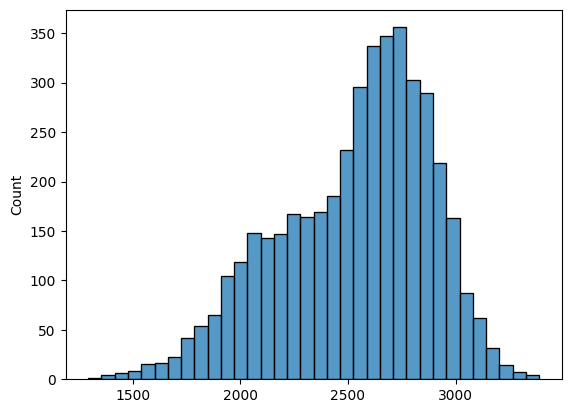

In [22]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

<Axes: ylabel='Count'>

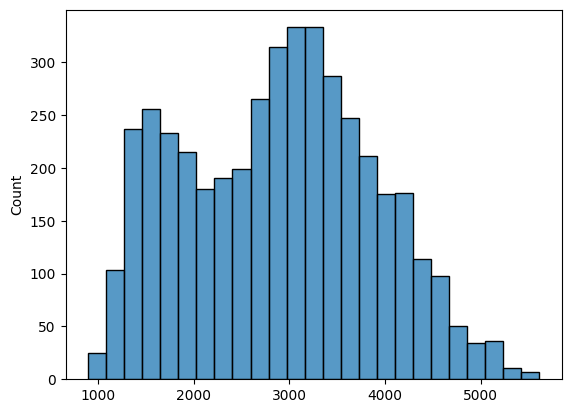

In [23]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

<Axes: ylabel='Count'>

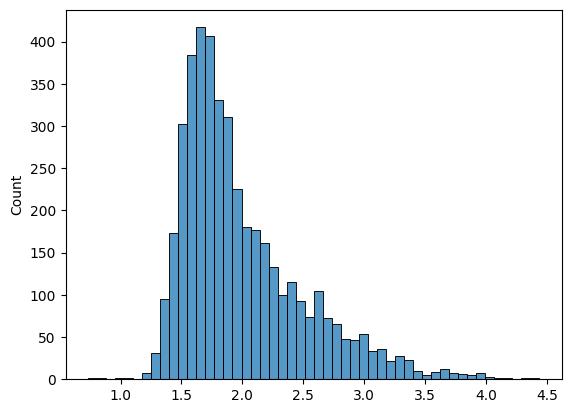

In [24]:
# % of mitochondrial expression per each cell distribution

mito_counts = adata[:, adata.var["mito"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50)

Data looks clean and preprocessed

In [31]:
adata.write_loom('adata.loom')

The loom file will lack these fields:
{'X_umap', 'PCs'}
Use write_obsm_varm=True to export multi-dimensional annotations


In [32]:
import loompy
ds = loompy.connect("/content/adata.loom")
ds

,,,,,,,,,,,,,,,,,CellType,Enterocyte,Enterocyte,Enterocyte,Enterocyte,Enterocyte,Enterocyte,Enterocyte,Enterocyte,Enterocyte,Enterocyte,...
,,,,,,,,,,,,,,,,,assay,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,10x 3' v2,...
,,,,,,,,,,,,,,,,,assay_ontology_term_id,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,EFO:0009899,...
,,,,,,,,,,,,,,,,,cell_type,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,enterocyte of colon,...
,,,,,,,,,,,,,,,,,cell_type_ontology_term_id,CL:1000347,CL:1000347,CL:1000347,CL:1000347,CL:1000347,CL:1000347,CL:1000347,CL:1000347,CL:1000347,CL:1000347,...
,,,,,,,,,,,,,,,,,development_stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,54-year-old human stage,...
,,,,,,,,,,,,,,,,,development_stage_ontology_term_id,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,HsapDv:0000148,...
,,,,,,,,,,,,,,,,,disease,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,adenocarcinoma,...
,,,,,,,,,,,,,,,,,disease_ontology_term_id,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,MONDO:0004970,...
,,,,,,,,,,,,,,,,,donor_id,Colon-1,Colon-1,Colon-1,Colon-1,Colon-1,Colon-1,Colon-1,Colon-1,Colon-1,Colon-1,...
,,,,,,,,,,,,,,,,,index,AAGGAGCAGTTAGGTA_Colon-1_Enterocyte,ACCTTTAGTACTTGAC_Colon-1_Enterocyte,ACGGGCTAGTCAAGCG_Colon-1_Enterocyte,AGATCTGCAAGGACAC_Colon-1_Enterocyte,ATGGGAGCAATGCCAT_Colon-1_Enterocyte,ATTCTACTCCGTACAA_Colon-1_Enterocyte,CAACTAGGTATAGGTA_Colon-1_Enterocyte,CACAAACAGTGCGATG_Colon-1_Enterocyte,CACCTTGAGTTAGGTA_Colon-1_Enterocyte,CATGCCTCAAGCTGGA_Colon-1_Enterocyte,...


Loom is a type of data simular to anndata but shows all of it in one table, which is a little hard to read